## Car Evaluation Classification 

- Student ID: 21201749
- Student Name: ONG Jun Kye
- Dataset Resource: https://archive.ics.uci.edu/dataset/19/car+evaluation

In [1]:
# pip install ucimlrepo
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 


# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

In [3]:
display(X.shape)
# 1728 data instances

(1728, 6)

### X Variables (6 columns)

In [4]:
display(type(X), X)
display(X.info())
display(X.isnull().any())

pandas.core.frame.DataFrame

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


None

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
dtype: bool

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


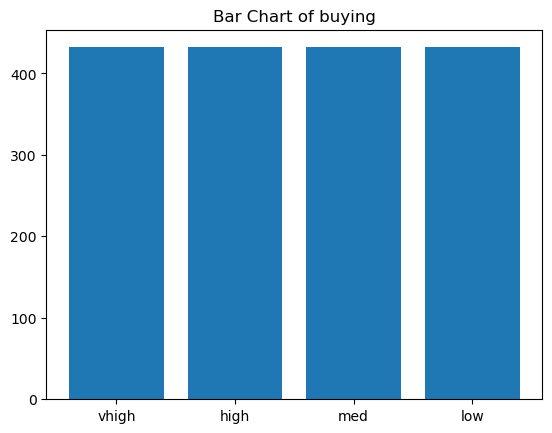

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


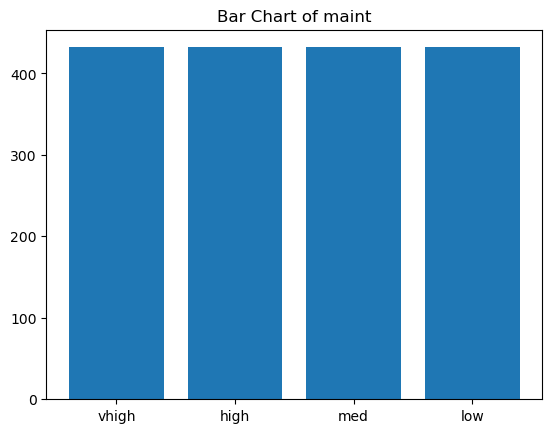

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


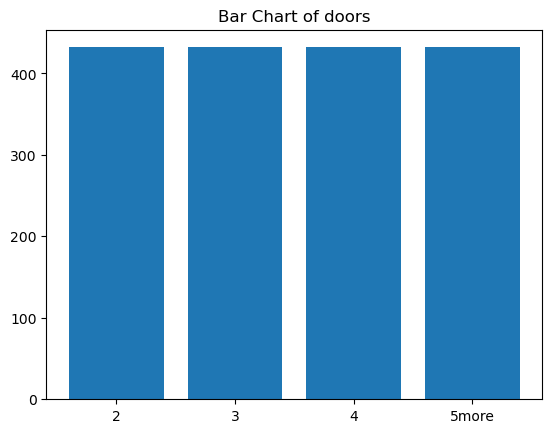

persons
2       576
4       576
more    576
Name: count, dtype: int64


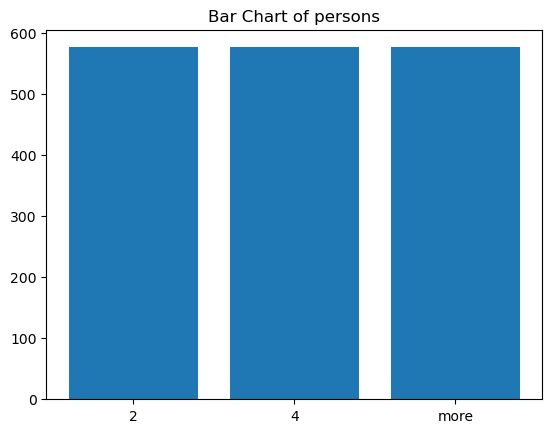

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


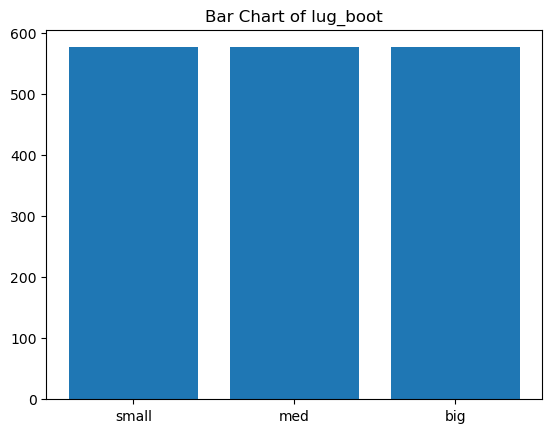

safety
low     576
med     576
high    576
Name: count, dtype: int64


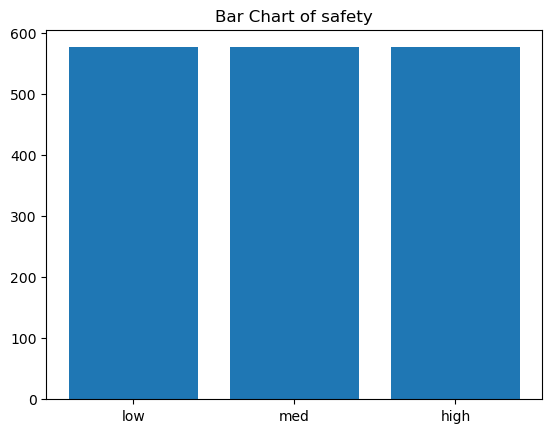

In [5]:
example = X['buying'].value_counts().reset_index()

for x in X.columns:
    print(X[x].value_counts())
    plt.bar(X[x].value_counts().reset_index()[x], X[x].value_counts().reset_index()['count'])
    plt.title('Bar Chart of {}'.format(x))
    plt.show();

### y variable (one column, class type)

In [6]:
display(y, y.info())
display(y['class'].value_counts())
display(y.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


None

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

class    False
dtype: bool

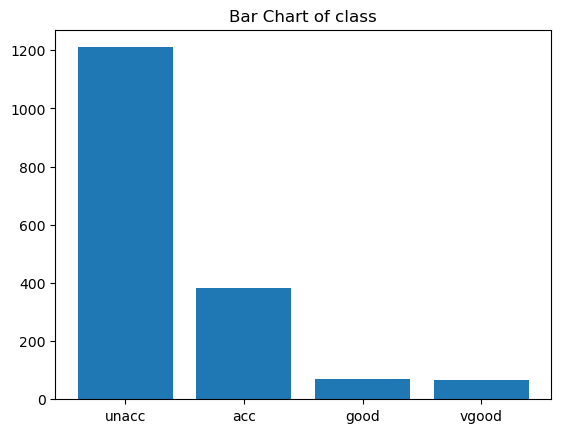

In [7]:
plt.bar(y.value_counts().reset_index()['class'], y.value_counts().reset_index()['count'])
plt.title("Bar Chart of class");

### Machine Learning with Decision Tree

Criterion:
- Entropy
- Gini Index

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import category_encoders as ce
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [9]:
columns = X.columns.tolist()
columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [10]:
# X_one_hot_encoded = pd.get_dummies(X[columns])

# X_train = X_encoded.fit_transform(X_train)
# X_test = X_encoded.transform(X_test)

#### Perform encoding to change categorical data to numerical data

In [11]:
# Define the order of categories for each column
# order_buying = {'low':1 , 'med': 2, 'high': 3, 'vhigh': 4}
# order_maint = {'low':1 , 'med': 2, 'high': 3, 'vhigh': 4}
# order_doors = {'2':1 , '3': 2, '4': 3, '5more': 4}
# order_persons= {'2':1 , '4': 2, 'more': 3}
# order_lug_boot= {'small':1 , 'med': 2, 'big': 3}
# order_safety= {'low': 1, 'med': 2, 'high': 3}


order_buying = {'low':4 , 'med': 3, 'high': 2, 'vhigh': 1}
order_maint = {'low':4 , 'med': 3, 'high': 2, 'vhigh': 1}
order_doors = {'2':4 , '3': 3, '4': 2, '5more': 1}
order_persons= {'2':3 , '4': 2, 'more': 1}
order_lug_boot= {'small':3 , 'med': 2, 'big': 1}
order_safety= {'low': 3, 'med': 2, 'high': 1}



X_encoded = ce.OrdinalEncoder(mapping=[
    {'col': 'buying', 'mapping': order_buying},
    {'col': 'maint', 'mapping': order_maint},
    {'col': 'doors', 'mapping': order_doors},
    {'col': 'persons', 'mapping': order_persons},
    {'col': 'lug_boot', 'mapping': order_lug_boot},
    {'col': 'safety', 'mapping': order_safety}  
])


X = X_encoded.fit_transform(X)

display(X_encoded, X.head())

OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',
                     'safety'],
               mapping=[{'col': 'buying', 'data_type': dtype('O'),
                         'mapping': low      4
med      3
high     2
vhigh    1
dtype: int64},
                        {'col': 'maint', 'data_type': dtype('O'),
                         'mapping': low      4
med      3
high     2
vhigh    1
dtype: int64},
                        {'col': 'doors', 'data_type': dtype('O'),
                         'mapping': 2        4
3        3
4        2
5more    1
dtype: int64},
                        {'col': 'persons', 'data_type': dtype('O'),
                         'mapping': 2       3
4       2
more    1
dtype: int64},
                        {'col': 'lug_boot', 'data_type': dtype('O'),
                         'mapping': small    3
med      2
big      1
dtype: int64},
                        {'col': 'safety', 'data_type': dtype('O'),
                         'mapping': low     3
med     2
high    1
dtype: int64}])

,buying,maint,doors,persons,lug_boot,safety
0,1,1,4,3,3,3
1,1,1,4,3,3,2
2,1,1,4,3,3,1
3,1,1,4,3,2,3
4,1,1,4,3,2,2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
display(X_train, X_test, y_train, y_test)

(1382, 6)

(346, 6)

(1382, 1)

(346, 1)

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,3,1,3,2,3,2
1709,4,4,1,3,1,1
706,2,3,2,3,2,2
678,2,3,3,3,2,3
...,...,...,...,...,...,...
1130,3,3,3,1,2,1
1294,3,4,1,1,1,2
860,2,4,1,1,2,1
1459,4,2,2,3,3,2


,buying,maint,doors,persons,lug_boot,safety
599,2,2,2,3,2,1
1201,3,4,4,2,2,2
628,2,2,1,3,1,2
1498,4,2,1,2,2,2
1263,3,4,2,1,2,3
...,...,...,...,...,...,...
100,1,1,1,1,3,2
274,1,3,2,3,2,2
1206,3,4,4,1,3,3
101,1,1,1,1,3,1


,class
107,unacc
901,unacc
1709,unacc
706,unacc
678,unacc
...,...
1130,vgood
1294,good
860,acc
1459,unacc


,class
599,unacc
1201,acc
628,unacc
1498,acc
1263,unacc
...,...
100,unacc
274,unacc
1206,unacc
101,unacc


In [13]:
display(X_train.info())
display(X_train.isnull().sum())
display(X_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1382 non-null   int32
 1   maint     1382 non-null   int32
 2   doors     1382 non-null   int32
 3   persons   1382 non-null   int32
 4   lug_boot  1382 non-null   int32
 5   safety    1382 non-null   int32
dtypes: int32(6)
memory usage: 43.2 KB


None

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

#### Using Entropy

In [14]:
model1 = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 5,            
                                random_state = 42)          

model1.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [15]:
display(model1.feature_importances_, X_train.columns) # shows the information gain for each feature in the entire model

array([0.14732642, 0.16552577, 0.        , 0.30504656, 0.        ,
       0.38210124])

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

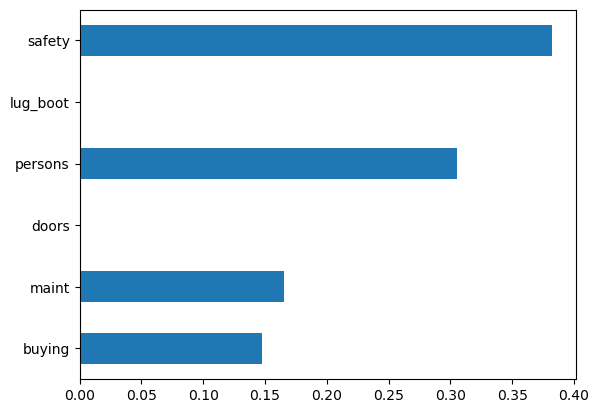

In [16]:
feat_importances_1 = pd.Series(model1.feature_importances_, index=X_train.columns)
feat_importances_1.plot(kind='barh');

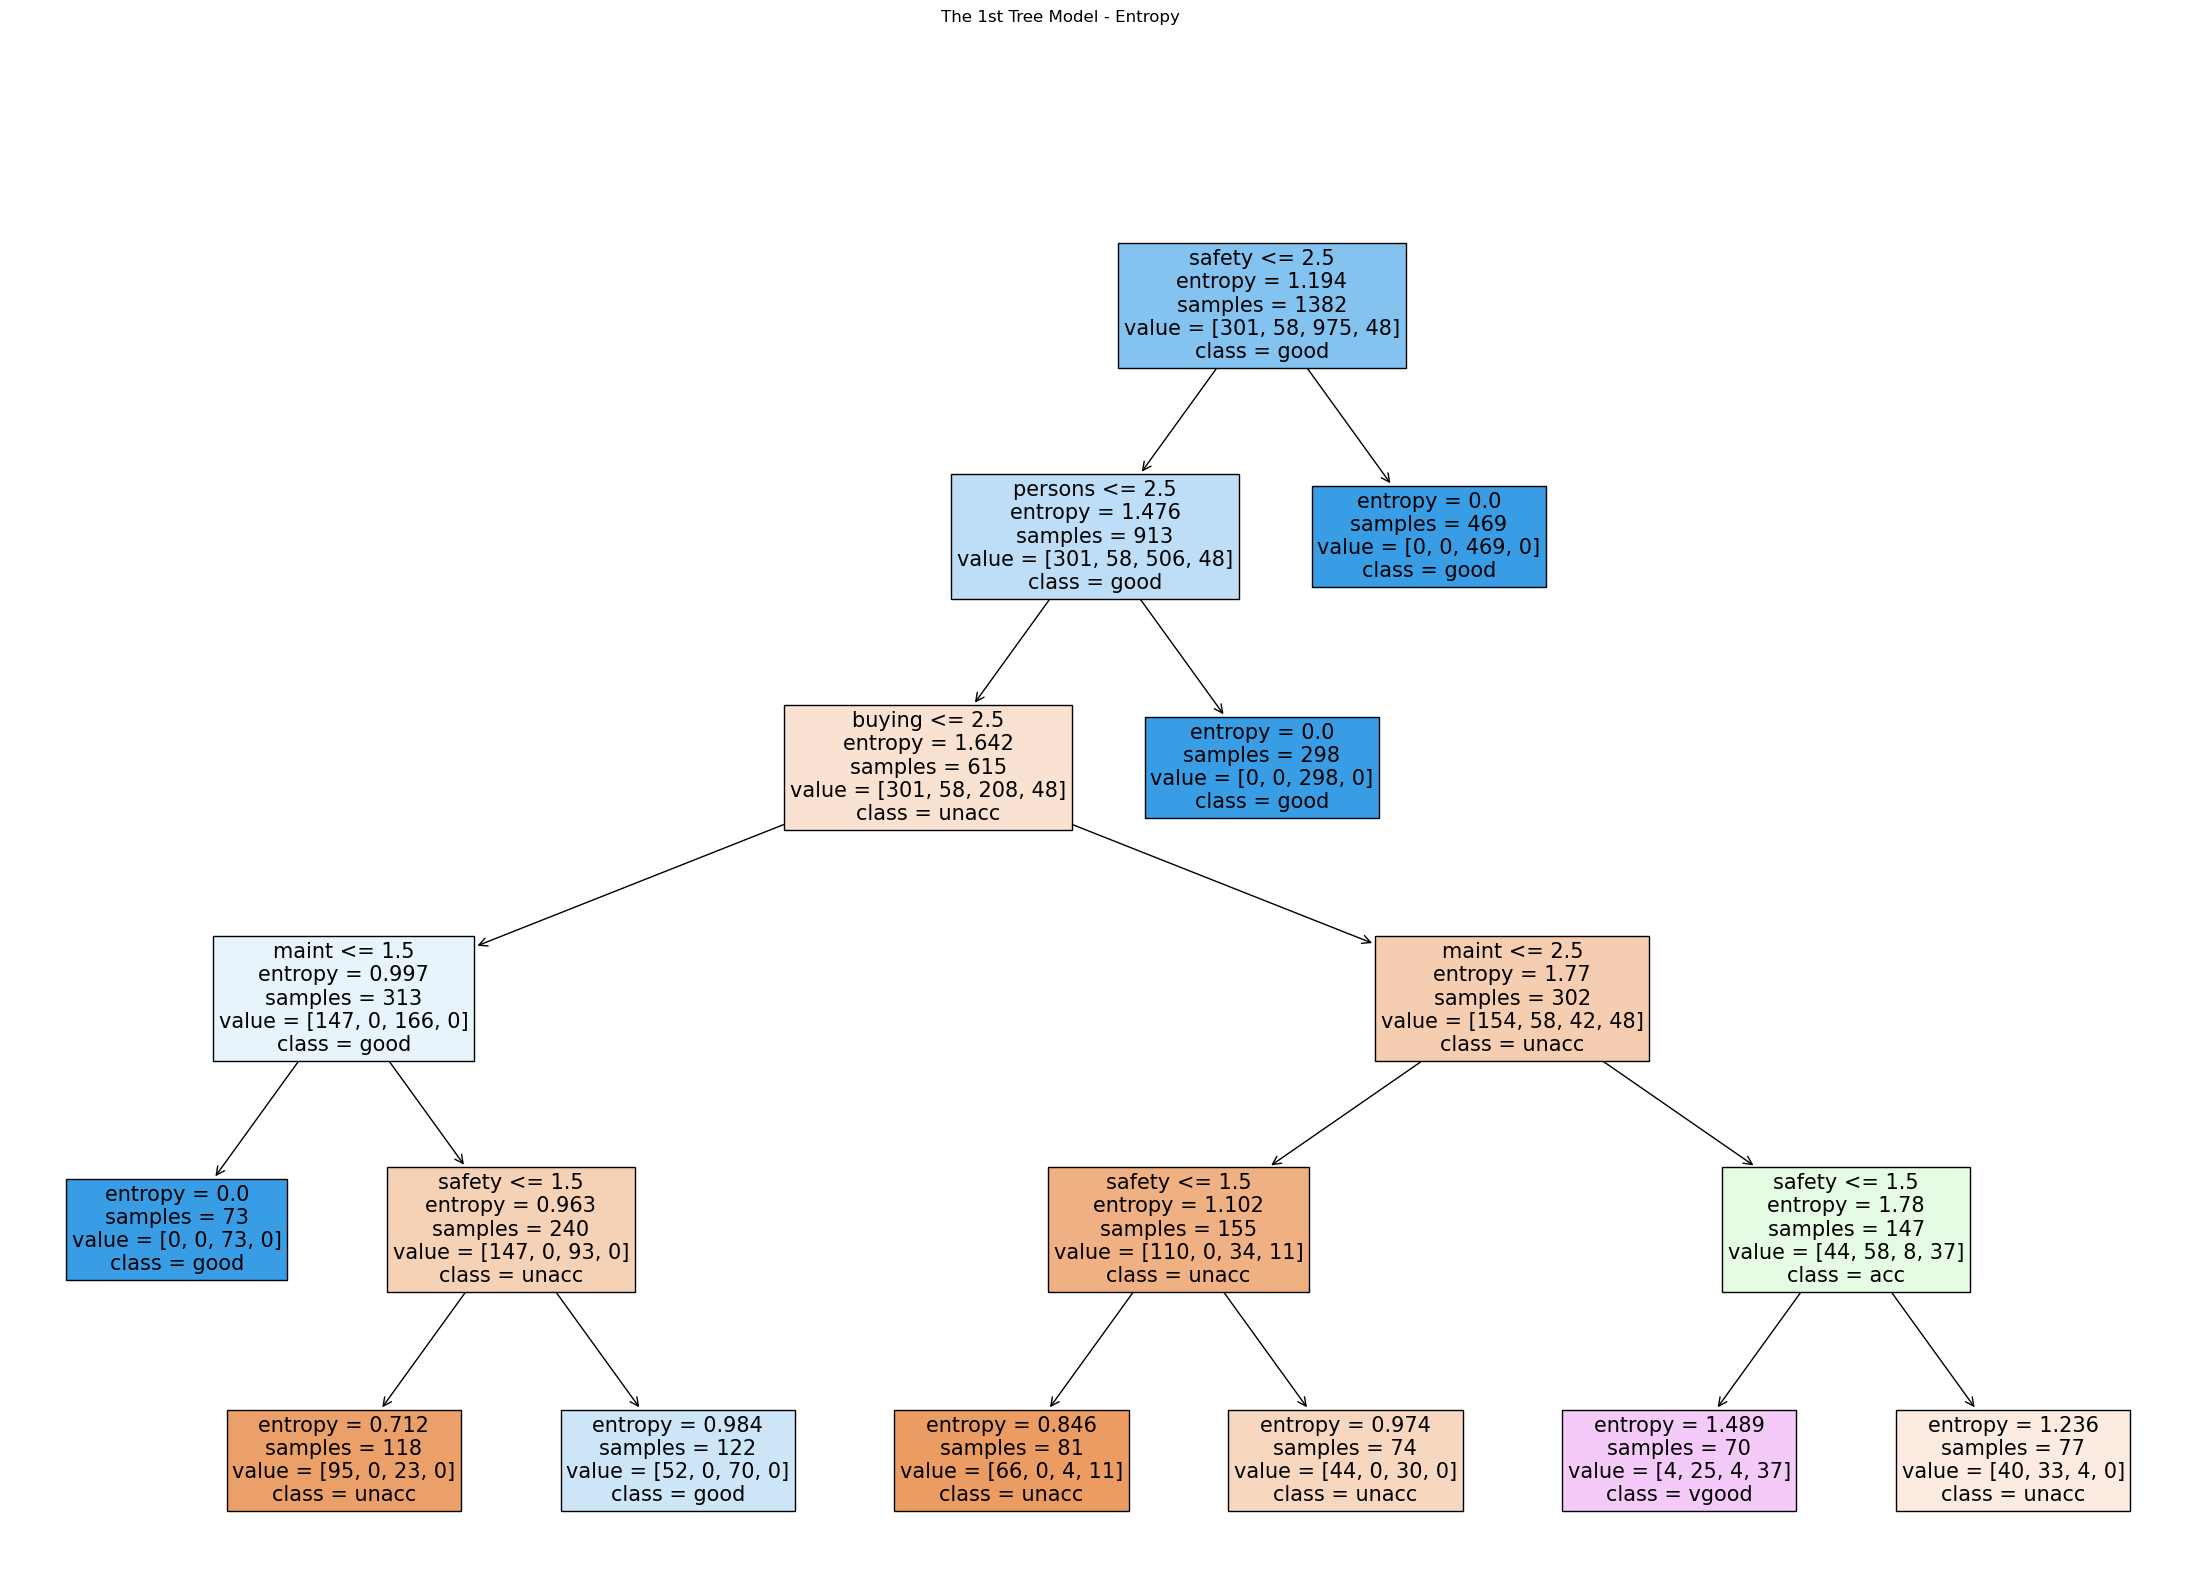

In [17]:
fig = plt.figure(figsize=(28,18))    

plot_tree(decision_tree = model1, 
          feature_names = X_train.columns.tolist(),
          class_names = ['unacc','acc', 'good','vgood'], 
          filled = True,                         # if True, paint nodes to indicate majority class  
          fontsize = 15);   

fig.suptitle('The 1st Tree Model - Entropy');                   # Add a title

In [18]:
print('Training performance: {:.3f}'.format(model1.score(X_train, y_train)))
print('Generalisation performance: {:.3f}'.format(model1.score(X_test, y_test)))

Training performance: 0.863
Generalisation performance: 0.879


In [19]:
model_tree_pred = model1.predict(X_test)                   
confusion_matrix(y_true = y_test, y_pred = model_tree_pred)   

array([[ 64,   0,  13,   6],
       [  6,   0,   0,   5],
       [ 10,   0, 225,   0],
       [  2,   0,   0,  15]], dtype=int64)

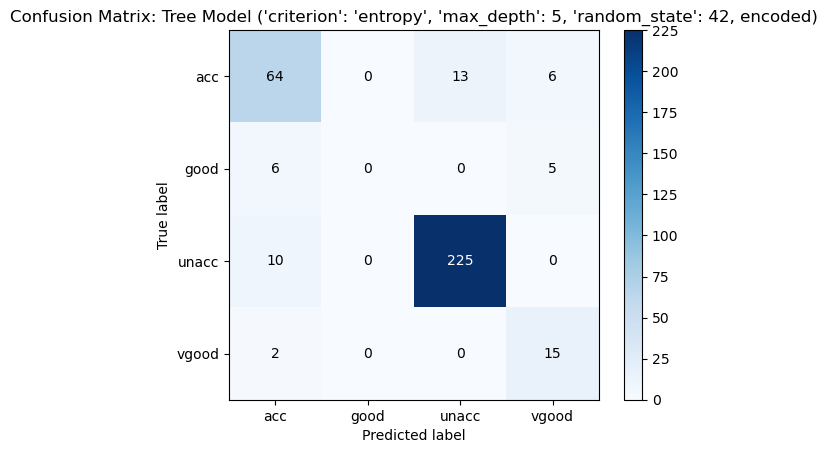

In [20]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = model_tree_pred, 
#                       cmap = 'BrBG',         #  Choose a prefered color map
                      #normalize = True,     #  Normalize frequency as percentage (of total true instances)   
                      title = "Confusion Matrix: Tree Model ('criterion': 'entropy', 'max_depth': 5, 'random_state': 42, encoded)"); 

In [21]:
print(classification_report(y_test, model_tree_pred))

              precision    recall  f1-score   support

         acc       0.78      0.77      0.78        83
        good       0.00      0.00      0.00        11
       unacc       0.95      0.96      0.95       235
       vgood       0.58      0.88      0.70        17

    accuracy                           0.88       346
   macro avg       0.58      0.65      0.61       346
weighted avg       0.86      0.88      0.87       346



#### Using GINI

In [22]:
model2 = DecisionTreeClassifier(criterion = 'gini',
                                max_depth = 5,             # Ajust max_depth to 5. 
                                random_state = 42)          # control randomness as the model randomly select a split(feature) when multiple splits(features) bring the same IG 

model2.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
display(model2.feature_importances_, X_train.columns) 

array([0.10782585, 0.19586872, 0.        , 0.3476227 , 0.01951925,
       0.32916348])

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

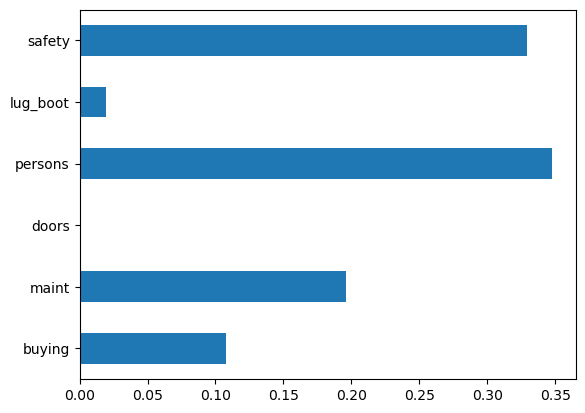

In [24]:
feat_importances_2 = pd.Series(model2.feature_importances_, index=X_train.columns)
feat_importances_2.plot(kind='barh');

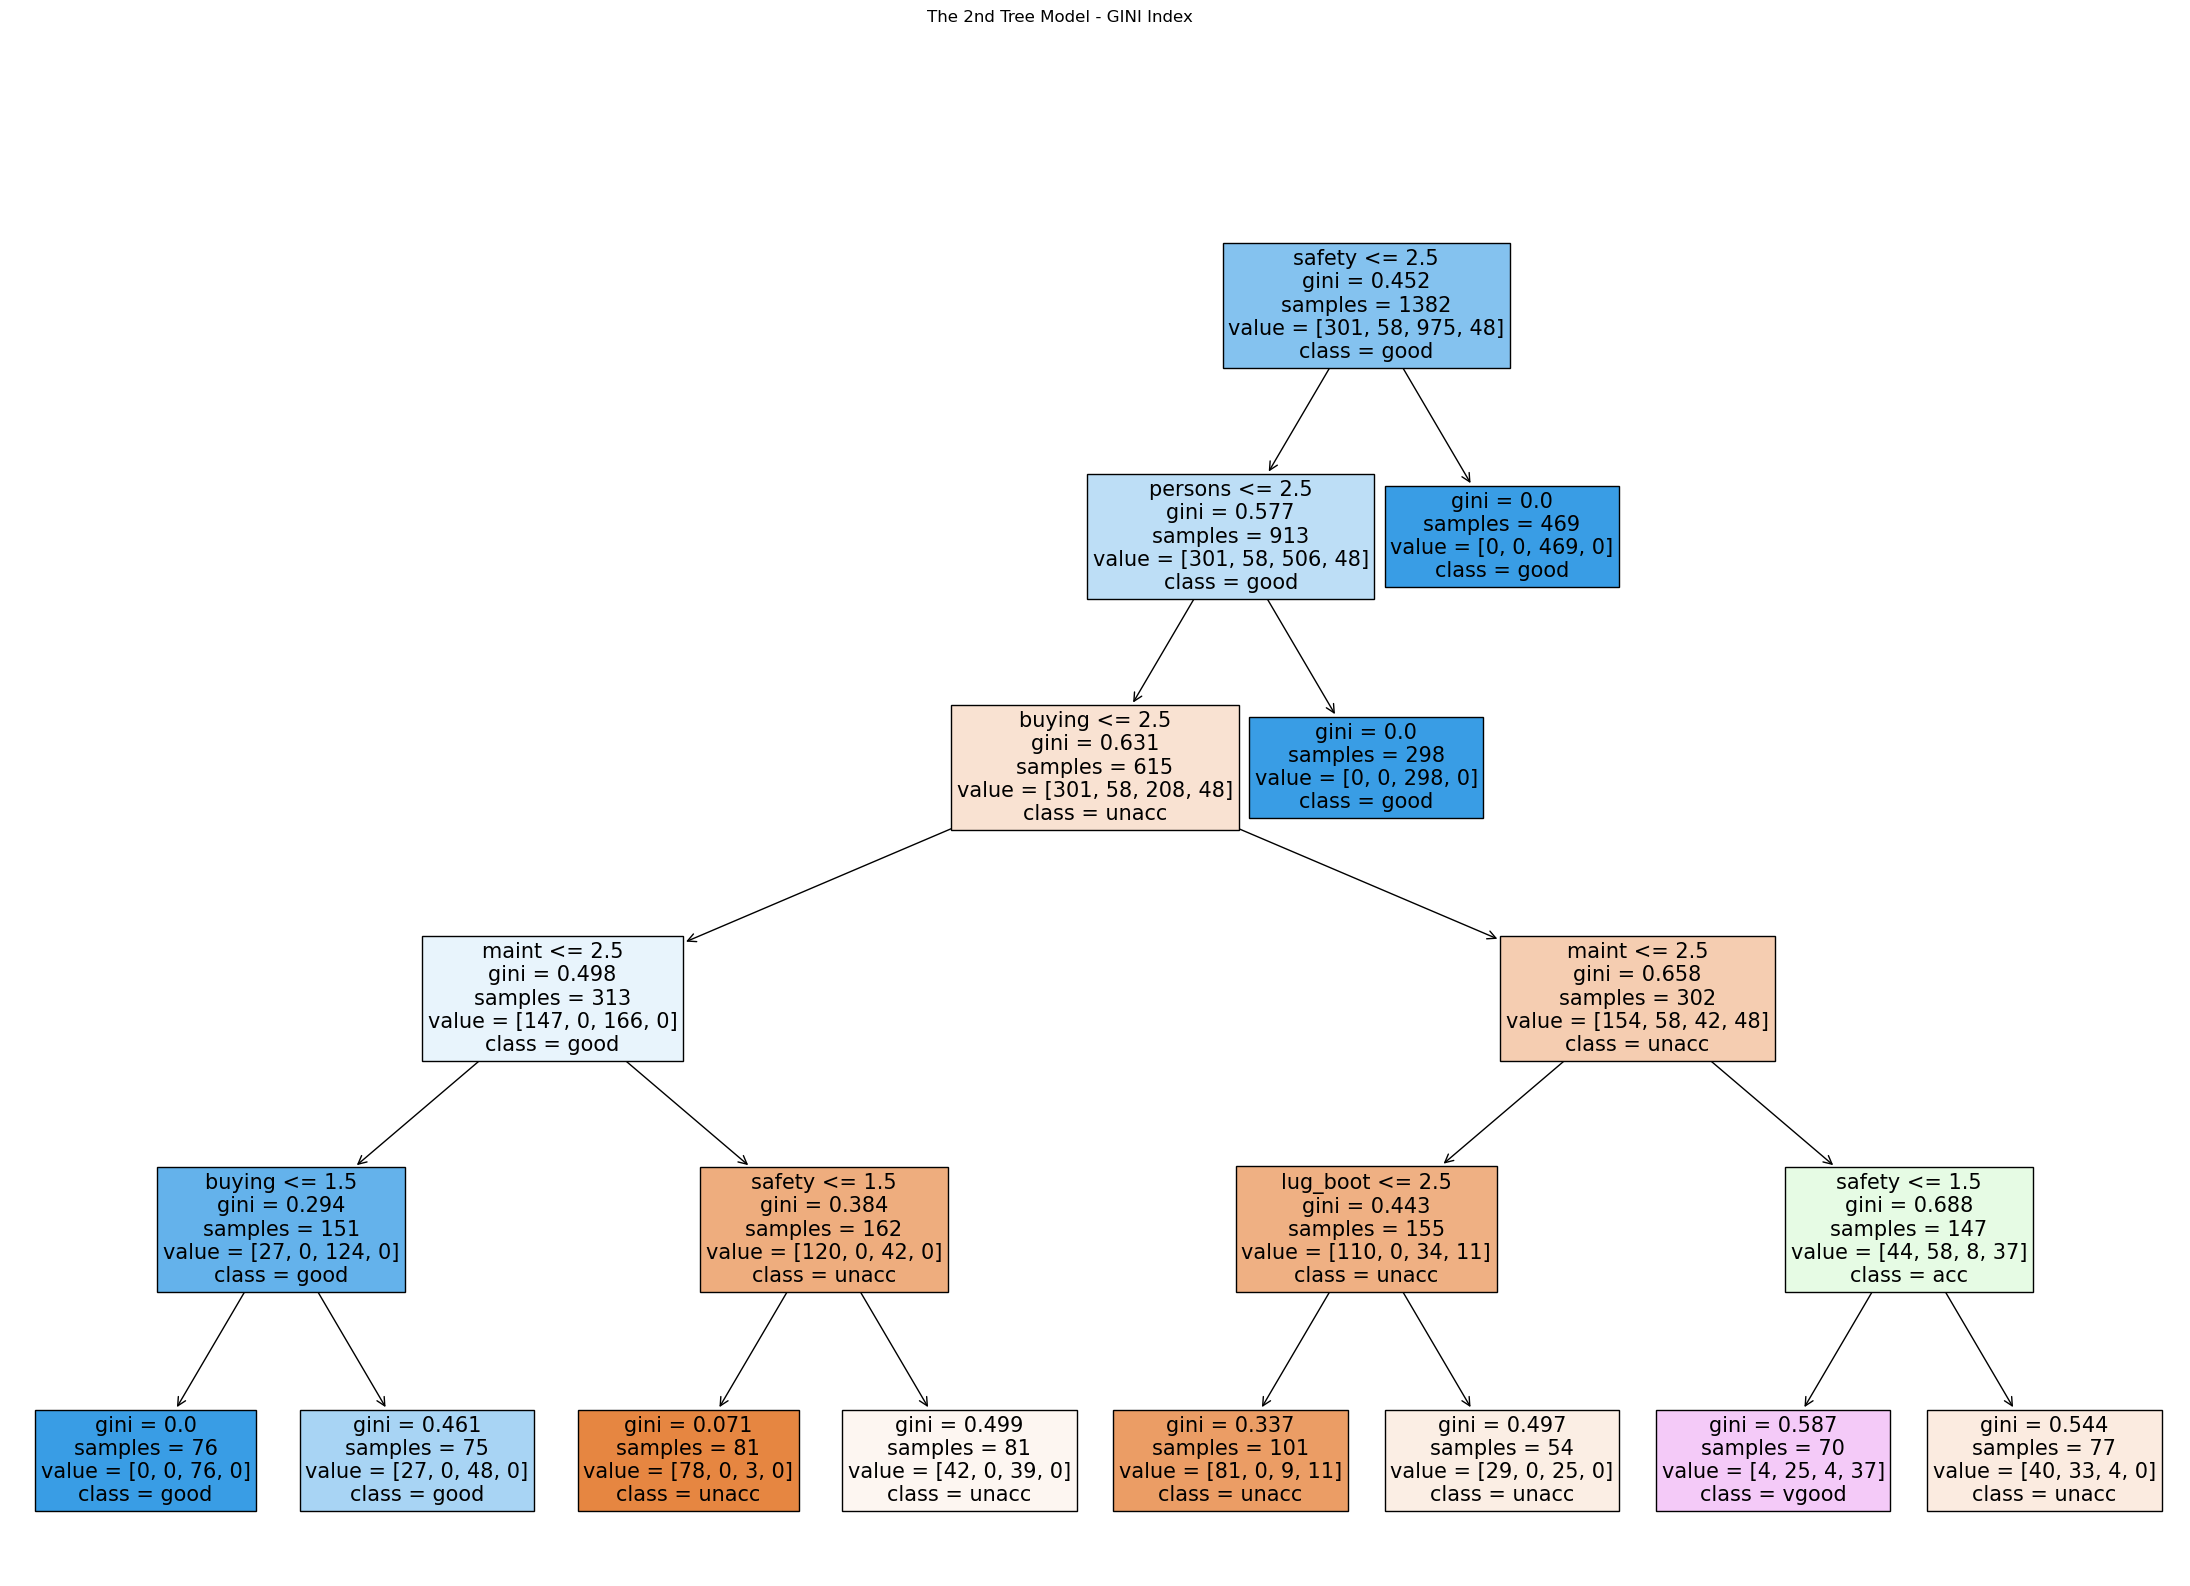

In [25]:
fig = plt.figure(figsize=(28,18))    

plot_tree(decision_tree = model2, 
          feature_names = X_train.columns.tolist(),
          class_names = ['unacc','acc', 'good','vgood'], 
          filled = True,                         # if True, paint nodes to indicate majority class  
          fontsize = 15);   

fig.suptitle('The 2nd Tree Model - GINI Index');                   # Add a title

In [26]:
print('Training performance: {:.3f}'.format(model2.score(X_train, y_train)))
print('Generalisation performance: {:.3f}'.format(model2.score(X_test, y_test)))

Training performance: 0.867
Generalisation performance: 0.890


In [27]:
model_tree_pred_2 = model2.predict(X_test)                   
confusion_matrix(y_true = y_test, y_pred = model_tree_pred_2)   

array([[ 68,   0,   9,   6],
       [  6,   0,   0,   5],
       [ 10,   0, 225,   0],
       [  2,   0,   0,  15]], dtype=int64)

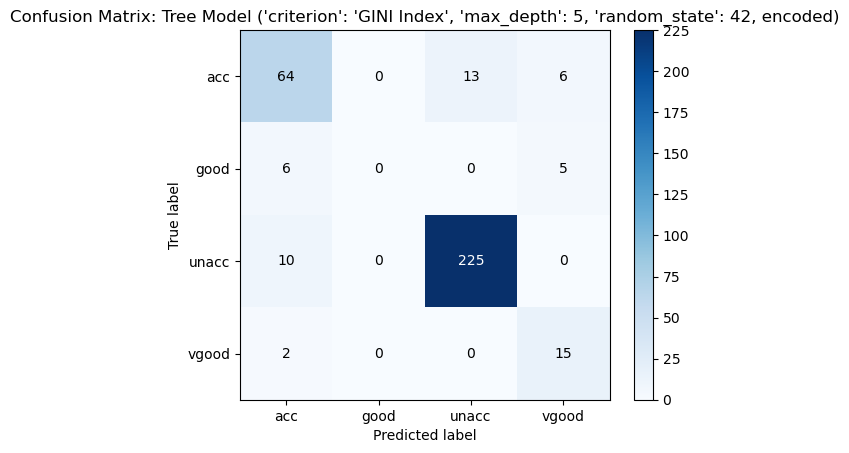

In [28]:
plot_confusion_matrix(y_true = y_test, 
                      y_pred = model_tree_pred, 
                      title = "Confusion Matrix: Tree Model ('criterion': 'GINI Index', 'max_depth': 5, 'random_state': 42, encoded)"); 

In [29]:
print(classification_report(y_test, model_tree_pred_2))

              precision    recall  f1-score   support

         acc       0.79      0.82      0.80        83
        good       0.00      0.00      0.00        11
       unacc       0.96      0.96      0.96       235
       vgood       0.58      0.88      0.70        17

    accuracy                           0.89       346
   macro avg       0.58      0.66      0.62       346
weighted avg       0.87      0.89      0.88       346

